# Solving the Cournot model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [4]:
import numpy as np
from scipy import optimize
import sympy as sm
from sympy import *

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

from modelproject import modelprojectClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model

In this project we are examing the Cournot competition model which is a game model describing quantity competition in an oligopolistic market. The Nash equilibrium in a Cournot model with two completely homogeneous players is given by x1 = x2. Under Cournot competition, total market output is strictly greater than under monopoly. In a Cournot model is as a starting point in equilibrium inefficient. In a Cournot equilibrium, then N = 1 corresponds to monopoly and N $->$ $\infty$  corresponding to perfect competition.

The set up is the standard Cournot model where we work with a linear demand curve

$p_i(q_i, q_j) = 1 - aq_i - bq_j$

and costs

$c_i(q) =c_i q$

Where $q_i$ denotes firm i's output on the market

Firm i´s profit is written as:

$\pi(q_i,q_j) = (1 - aq_i - bq_j) - cq_i$ 

**Write out the model in equations here.*** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Solve the model Analytically

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [57]:
# Define variables used in this model

q1 = symbols('q1')
q2 = symbols('q2')
a = symbols('a')
b = symbols('b')
c = symbols('c')
MC = c

In [58]:
# Define the inverse demand function and the cost function 

def p(q1,q2):
    return 1-a* q1 - b* q2

def cost(q,MC):
    if q == 0:
        cost = 0 
    else:
        cost = MC*q
    return cost

In [59]:
# Define the profit function of a firm with cost level c that produces output q1 while its competitor produces q2.

def profit(q1,q2,MC):
    return p(q1,q2)*q1 - cost(q1,MC)

In [60]:
# Derive the first order condition for q1

foc1 = diff(profit(q1,q2,MC),q1)
foc1


-2*a*q1 - b*q2 - c + 1

In [61]:
# Derive the first order condition for q2

foc2 = diff(profit(q2,q1,MC),q2)
foc2

-2*a*q2 - b*q1 - c + 1

In [62]:
# In equilibrium the first order condition for both firms are equal to 0

solve([foc1, foc2], [q1, q2])

{q1: (1 - c)/(2*a + b), q2: (1 - c)/(2*a + b)}

## Solve the model Numerically

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [48]:
# Clear previous python imports and variables

from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Define the inverse demand function and the cost function 

def p(q1,q2):
    return 1-a* q1 - b* q2

def costs(q,MC):
    return MC*q

In [51]:
# Define the profit function of a firm with cost level c that produces output $q_1$ while its competitor produces $q_2$.

def profits(demand_function,cost_function,MC,q1,q2):
    return demand_function(q1,q2)*q1-costs(q1,MC)

In [63]:
# Values for the demand parameters a, b

a = 1
b = 1
c = 1

Each firm wants to maximize its profit. However, Python does not maximization routines but only minimization routines. Hence, if we want to maximize profits, we need to minimize.

In [64]:

def reaction(q2,MC):
    q1 =  optimize.fminbound(lambda x: -profits(p,costs,MC,x,q2),0,1,full_output=1)
    return q1[0]

# Define the function -> equilibrium of q - R(q)
def fixed_point(q,c):
    return [q[0]-reaction(q[1],c[0]),q[1]-reaction(q[0],c[1])]

#Initial guess 
initial_guess = [0,0]

# Solve the model for the case where c1 = c2 = 0 and a = b = 1
optimize.fsolve(lambda q: fixed_point(q,[0,0]), initial_guess)

array([0.33333333, 0.33333333])

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Plot of the output level of firms' 1 and 2 as a function of c1

/var/folders/6g/ztqdjshx67n8pkkmdc8z2c3w0000gp/T/ipykernel_74556/3116457274.py:1: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  range_c = arange(0,0.51,0.01)


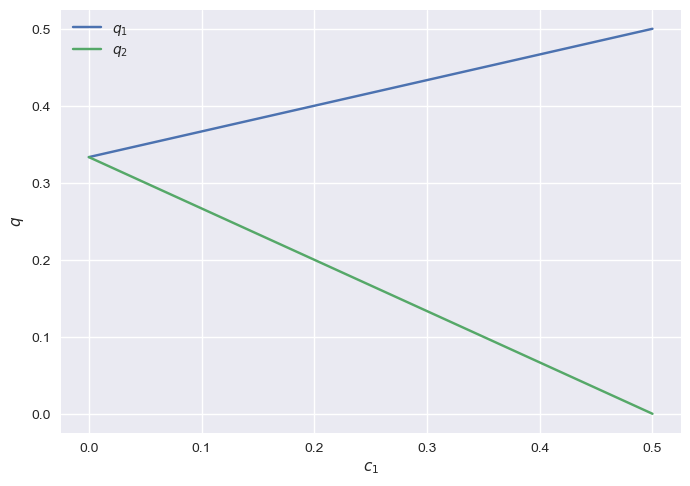

In [55]:
range_c = arange(0,0.51,0.01)
range_q = [optimize.fsolve(lambda q: fixed_point(q,[c,0]), [0,0]) for c in range_c]
plt.style.use('seaborn')
plt.clf()
plt.plot(range_c,array(range_q)[:,1], label = '$q_1$')
plt.plot(range_c,array(range_q)[:,0], label = '$q_2$')
plt.xlabel('$c_1$')
plt.ylabel('$q$')
plt.legend()
plt.savefig('Cournot.png')

# Conclusion

Add concise conclusion. 